## Import Modules

In [1]:
# conda install -c conda-forge imbalanced-learn

In [2]:
# !pip install imblearn --user

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import binarize

# Custom package for data preprocessing
import mytools as mt 

# Model building
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_curve, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Notebook settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Pretty display of multiple functions in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### File Location

In [4]:
# Data paths
import filepaths

## Load Data

In [5]:
df_churn = pd.read_csv(filepaths.processed_churn_data, sep=',')
mt.check_unique_no(df_churn, ['customer_id'])
df_churn.shape

Data has 5647 unique customer_id


(5647, 36)

In [6]:
# First 2 rows of data
df_churn.head(2)

,customer_id,gender,biological_age.group,city_code,customer_status,account_age.years.group,number_of_unique_purchase_days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags,sum.Books,sum.Clothing,sum.Electronics,sum.Footwear,sum.Home and kitchen,sum.Academic,sum.Audio and video,sum.Bath,sum.Cameras,sum.Children,sum.Comics,sum.Computers,sum.DIY,sum.Fiction,sum.Furnishing,sum.Kids,sum.Kitchen,sum.Mens,sum.Mobiles,sum.Non-Fiction,sum.Personal Appliances,sum.Tools,sum.Women,churned
0,268408,M,40_45,4.00,converted,02_03,11.00,6217.84,6491.88,3894.02,7668.70,1064.11,1033.17,890.63,7668.70,7526.15,6089.66,0.00,2873.00,0.00,4795.70,0.00,0.00,0.00,0.00,1033.17,0.00,1034.28,6089.66,6491.88,0.00,0.00,0.00,0.00,1954.74,no
1,269696,F,40_45,8.00,converted,03_04,3.00,0.00,4488.51,0.00,0.00,0.00,0.00,0.00,4488.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4488.51,0.00,0.00,0.00,0.00,yes


In [7]:
# Last 2 rows of data
df_churn.tail(2)

,customer_id,gender,biological_age.group,city_code,customer_status,account_age.years.group,number_of_unique_purchase_days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags,sum.Books,sum.Clothing,sum.Electronics,sum.Footwear,sum.Home and kitchen,sum.Academic,sum.Audio and video,sum.Bath,sum.Cameras,sum.Children,sum.Comics,sum.Computers,sum.DIY,sum.Fiction,sum.Furnishing,sum.Kids,sum.Kitchen,sum.Mens,sum.Mobiles,sum.Non-Fiction,sum.Personal Appliances,sum.Tools,sum.Women,churned
5645,269626,F,22_25,5.00,converted,03_04,2.00,0.00,3573.57,0.00,704.99,0.00,0.00,3573.57,0.00,0.00,704.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3573.57,0.00,0.00,0.00,0.00,0.00,704.99,0.00,yes
5646,274308,F,22_25,5.00,converted,02_03,3.00,0.00,1984.58,0.00,7120.62,0.00,3248.70,0.00,0.00,5856.50,0.00,3248.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5856.50,0.00,0.00,0.00,0.00,0.00,yes


## Check for Missing Data

In [8]:
pd.isnull(np.nan)

True

In [9]:
df_churn.isnull().sum().tail()

sum.Non-Fiction            141
sum.Personal Appliances    141
sum.Tools                  141
sum.Women                  141
churned                    141
dtype: int64

In [10]:
df_churn['customer_status'].value_counts(dropna=False)

converted                              5506
voluntarily churned - not converted     141
Name: customer_status, dtype: int64

- Some data is missing - people who made no purchase at all

In [11]:
df_churn_raw = df_churn.copy()
df_churn = df_churn_raw[df_churn_raw['customer_status'] == 'converted']
mt.check_unique_no(df_churn, ['customer_id'])
df_churn.shape

Data has 5506 unique customer_id


(5506, 36)

In [12]:
# df_churn.isnull().sum()

## Check Summary Statistics

#### Descriptive statistics

In [13]:
df_churn.describe()

,customer_id,city_code,number_of_unique_purchase_days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags,sum.Books,sum.Clothing,sum.Electronics,sum.Footwear,sum.Home and kitchen,sum.Academic,sum.Audio and video,sum.Bath,sum.Cameras,sum.Children,sum.Comics,sum.Computers,sum.DIY,sum.Fiction,sum.Furnishing,sum.Kids,sum.Kitchen,sum.Mens,sum.Mobiles,sum.Non-Fiction,sum.Personal Appliances,sum.Tools,sum.Women
count,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00
mean,271034.04,5.48,4.18,1764.56,1757.08,1700.83,3600.58,749.13,2328.86,1135.33,1947.41,1129.64,1532.69,373.29,388.68,382.71,387.47,401.64,381.56,379.61,378.71,405.42,381.15,772.99,378.37,1121.02,408.41,388.23,383.25,390.46,1120.08
std,2453.21,2.86,2.11,2679.26,2614.02,2594.21,3850.55,1790.31,3140.30,2205.91,2834.24,2168.59,2423.20,1251.94,1281.61,1216.18,1281.41,1290.70,1240.11,1280.23,1246.47,1323.14,1229.71,1801.97,1226.56,2185.85,1297.14,1270.55,1276.88,1246.73,2145.67
min,266783.00,1.00,1.00,-7833.34,-9352.72,-6497.40,-5828.88,-7740.52,-7967.05,-6331.65,-6746.02,-9352.72,-8110.70,-5843.24,-2813.33,-4952.61,-6497.40,-4512.82,-5580.25,-6596.85,-7967.05,-849.75,-2055.30,-9352.72,-6143.80,-5337.15,-5118.36,-5471.96,-6746.02,-8110.70,-7740.52
25%,268908.25,3.00,3.00,0.00,0.00,0.00,185.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,271024.50,5.00,4.00,0.00,199.45,0.00,2509.45,0.00,994.50,0.00,421.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,273171.75,8.00,6.00,2882.39,2914.44,2760.29,5711.75,122.38,3834.63,1385.67,3179.64,1428.76,2489.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,279.29,0.00,1370.20,0.00,0.00,0.00,0.00,1415.51
max,275265.00,10.00,13.00,18141.89,19861.27,19165.12,22333.15,15691.00,23292.29,21858.01,19086.67,18420.35,16033.55,11926.26,14663.35,11563.83,13475.48,12524.07,12820.21,12840.10,14988.22,15536.30,11487.58,17471.15,14221.35,24077.95,12791.48,12763.85,12308.59,11524.05,17948.51


In [14]:
df_churn.describe(include=['object'])

,gender,biological_age.group,customer_status,account_age.years.group,churned
count,5506,5506,5506,5506,5506
unique,2,5,1,4,2
top,M,25_30,converted,03_04,no
freq,2828,1220,5506,3626,4174


- High number of customers have held accounts between 3 to 4 years
- High number of customers are in the age range between 25 and 30
- High number of customers are repeat purchasers, never returned an item they bought, nor churned

#### Average distribution across the two churned classes

In [15]:
df_churn.groupby('churned').mean()

,customer_id,city_code,number_of_unique_purchase_days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags,sum.Books,sum.Clothing,sum.Electronics,sum.Footwear,sum.Home and kitchen,sum.Academic,sum.Audio and video,sum.Bath,sum.Cameras,sum.Children,sum.Comics,sum.Computers,sum.DIY,sum.Fiction,sum.Furnishing,sum.Kids,sum.Kitchen,sum.Mens,sum.Mobiles,sum.Non-Fiction,sum.Personal Appliances,sum.Tools,sum.Women
churned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,271022.74,5.48,4.59,1913.89,1940.20,1876.56,3961.18,829.88,2571.87,1254.79,2138.99,1235.73,1660.57,423.43,436.16,423.07,430.02,429.93,413.62,413.40,424.37,446.77,415.05,848.66,407.76,1233.25,443.67,433.75,415.74,414.69,1238.48
yes,271069.45,5.50,2.90,1296.62,1183.24,1150.17,2470.62,496.10,1567.34,761.01,1347.10,797.17,1131.95,216.19,239.88,256.26,254.11,313.02,281.07,273.72,235.63,275.85,274.91,535.86,286.25,769.33,297.92,245.59,281.47,314.52,749.08


#### Correlation between predictors

In [16]:
df_churn_corr = df_churn.drop(['churned'], axis=1)
df_churn_corr.columns

Index(['customer_id', 'gender', 'biological_age.group', 'city_code',
       'customer_status', 'account_age.years.group',
       'number_of_unique_purchase_days', 'sum.Flagship store', 'sum.MBR',
       'sum.TeleShop', 'sum.e-Shop', 'sum.Bags', 'sum.Books', 'sum.Clothing',
       'sum.Electronics', 'sum.Footwear', 'sum.Home and kitchen',
       'sum.Academic', 'sum.Audio and video', 'sum.Bath', 'sum.Cameras',
       'sum.Children', 'sum.Comics', 'sum.Computers', 'sum.DIY', 'sum.Fiction',
       'sum.Furnishing', 'sum.Kids', 'sum.Kitchen', 'sum.Mens', 'sum.Mobiles',
       'sum.Non-Fiction', 'sum.Personal Appliances', 'sum.Tools', 'sum.Women'],
      dtype='object')

In [17]:
df_churn_corr.corr()

,customer_id,city_code,number_of_unique_purchase_days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags,sum.Books,sum.Clothing,sum.Electronics,sum.Footwear,sum.Home and kitchen,sum.Academic,sum.Audio and video,sum.Bath,sum.Cameras,sum.Children,sum.Comics,sum.Computers,sum.DIY,sum.Fiction,sum.Furnishing,sum.Kids,sum.Kitchen,sum.Mens,sum.Mobiles,sum.Non-Fiction,sum.Personal Appliances,sum.Tools,sum.Women
customer_id,1.00,0.02,-0.01,-0.00,0.02,-0.02,-0.01,-0.02,-0.01,-0.00,0.01,-0.02,0.01,0.01,0.01,0.01,0.01,-0.01,-0.01,-0.00,0.01,-0.01,0.02,-0.02,0.00,-0.02,-0.00,-0.00,0.00,-0.00,-0.00
city_code,0.02,1.00,0.00,0.00,-0.01,-0.00,-0.00,0.02,-0.02,-0.00,-0.01,0.02,-0.01,-0.02,-0.03,0.00,-0.00,0.01,-0.02,0.00,-0.00,-0.02,-0.01,0.00,0.01,0.01,-0.00,0.01,0.01,-0.02,0.03
number_of_unique_purchase_days,-0.01,0.00,1.00,0.25,0.25,0.27,0.41,0.17,0.32,0.21,0.28,0.21,0.25,0.14,0.12,0.14,0.13,0.13,0.11,0.12,0.13,0.14,0.13,0.18,0.10,0.20,0.13,0.15,0.12,0.11,0.21
sum.Flagship store,-0.00,0.00,0.25,1.00,-0.02,-0.02,-0.01,0.12,0.22,0.14,0.19,0.15,0.18,0.08,0.08,0.11,0.07,0.10,0.08,0.10,0.10,0.09,0.09,0.12,0.07,0.13,0.11,0.10,0.07,0.08,0.17
sum.MBR,0.02,-0.01,0.25,-0.02,1.00,0.01,-0.00,0.13,0.24,0.17,0.20,0.11,0.18,0.10,0.11,0.09,0.10,0.07,0.10,0.10,0.11,0.12,0.09,0.12,0.11,0.13,0.06,0.09,0.06,0.07,0.16
sum.TeleShop,-0.02,-0.00,0.27,-0.02,0.01,1.00,-0.02,0.13,0.20,0.16,0.19,0.16,0.16,0.10,0.08,0.08,0.11,0.08,0.07,0.07,0.07,0.07,0.10,0.15,0.06,0.16,0.08,0.10,0.08,0.08,0.14
sum.e-Shop,-0.01,-0.00,0.41,-0.01,-0.00,-0.02,1.00,0.18,0.33,0.22,0.29,0.25,0.25,0.15,0.13,0.13,0.12,0.16,0.13,0.13,0.10,0.13,0.11,0.18,0.11,0.25,0.12,0.13,0.13,0.13,0.21
sum.Bags,-0.02,0.02,0.17,0.12,0.13,0.13,0.18,1.00,0.00,0.00,-0.01,-0.01,-0.02,0.02,-0.02,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.01,0.41,0.01,-0.01,-0.02,-0.02,0.41
sum.Books,-0.01,-0.02,0.32,0.22,0.24,0.20,0.33,0.00,1.00,-0.02,-0.02,-0.02,-0.01,0.41,-0.01,0.01,-0.02,0.43,0.38,-0.00,0.39,0.44,-0.00,-0.02,-0.01,-0.01,-0.01,0.42,-0.01,-0.01,-0.01
sum.Clothing,-0.00,-0.00,0.21,0.14,0.17,0.16,0.22,0.00,-0.02,1.00,-0.02,-0.01,0.00,0.00,0.01,0.01,-0.02,-0.03,-0.01,0.00,-0.02,0.01,0.00,0.40,-0.00,0.34,-0.03,-0.00,-0.01,-0.00,0.34


## Establish baseline for logistic regression model

In [18]:
df_churn['churned'].value_counts()

no     4174
yes    1332
Name: churned, dtype: int64

In [19]:
df_churn['churned'].value_counts(normalize=True)

no    0.76
yes   0.24
Name: churned, dtype: float64

If a dumb model was to always predict that a patient did not churn, it will be correct 76% of the time. This 76% is the **null accuracy**

This is an **imbalanced classification problem** because of the majority occurence of the 'no' class vs the minority occurence of the 'yes' class observations.

This imbalance in the data classes can be treated in either of two ways to ensure the logistic regression algorithm learns the right patterns when it is implemented on the data. This includes:
- **resampling** the training data before modeling using techniques such as undersampling, oversampling, SMOTE (synthetic minority oversampling technique)
- using **precision and recall in the confusion matrix** to evaluate model performance.

We will use the latter.

## Preprocess Data

### Drop Some Features

In [20]:
df_churn = df_churn.drop(['customer_id', 'customer_status', 'city_code'], axis=1) #,  'revenue_type.new.sum' 'customer_status.at_risk.sum', 'customer_status.active.sum'
df_churn.shape

(5506, 33)

### Encode Data

#### Target : Identify positive class and encode target variables

- Because we are interested in predicting those who have churned, our **positive class** will be 'yes' which we will encode as 1. 'no' is the **negative class** and will be encoded as 0.

In [21]:
# Encode target variables
df_churn['churned'] = df_churn['churned'].map({'yes':1, 'no':0})

#### Features : Encode categorical features as dummy variables

In [22]:
cat_features = list(df_churn.describe(include=['object']).columns.values)
cat_features

['gender', 'biological_age.group', 'account_age.years.group']

In [23]:
df_cat_features = df_churn[cat_features]
df_cat_features.shape
df_cat_features.head()

(5506, 3)

,gender,biological_age.group,account_age.years.group
0,M,40_45,02_03
1,F,40_45,03_04
2,F,40_45,02_03
3,F,40_45,03_04
4,M,40_45,03_04


In [24]:
df_cat_features_encoded = pd.get_dummies(df_cat_features, drop_first=True)#
df_cat_features_encoded.head()
df_cat_features_encoded.shape

,gender_M,biological_age.group_25_30,biological_age.group_30_35,biological_age.group_35_40,biological_age.group_40_45,account_age.years.group_02_03,account_age.years.group_03_04,account_age.years.group__<01
0,1,0,0,0,1,1,0,0
1,0,0,0,0,1,0,1,0
2,0,0,0,0,1,1,0,0
3,0,0,0,0,1,0,1,0
4,1,0,0,0,1,0,1,0


(5506, 8)

In [25]:
df_churn.drop(cat_features, axis=1, inplace=True)

In [26]:
df_churn = pd.concat([df_churn, df_cat_features_encoded], axis=1).reset_index(drop=True)
df_churn.shape
df_churn.head(2)

(5506, 38)

,number_of_unique_purchase_days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags,sum.Books,sum.Clothing,sum.Electronics,sum.Footwear,sum.Home and kitchen,sum.Academic,sum.Audio and video,sum.Bath,sum.Cameras,sum.Children,sum.Comics,sum.Computers,sum.DIY,sum.Fiction,sum.Furnishing,sum.Kids,sum.Kitchen,sum.Mens,sum.Mobiles,sum.Non-Fiction,sum.Personal Appliances,sum.Tools,sum.Women,churned,gender_M,biological_age.group_25_30,biological_age.group_30_35,biological_age.group_35_40,biological_age.group_40_45,account_age.years.group_02_03,account_age.years.group_03_04,account_age.years.group__<01
0,11.00,6217.84,6491.88,3894.02,7668.70,1064.11,1033.17,890.63,7668.70,7526.15,6089.66,0.00,2873.00,0.00,4795.70,0.00,0.00,0.00,0.00,1033.17,0.00,1034.28,6089.66,6491.88,0.00,0.00,0.00,0.00,1954.74,0,1,0,0,0,1,1,0,0
1,3.00,0.00,4488.51,0.00,0.00,0.00,0.00,0.00,4488.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4488.51,0.00,0.00,0.00,0.00,1,0,0,0,0,1,0,1,0


In [27]:
# df_churn.isnull().sum()

### Standardize Data

In [28]:
# Target
df_target = df_churn['churned']
df_target.shape

(5506,)

In [29]:
# Features
df_features = df_churn.drop(['churned'], axis = 1)
df_features.shape

(5506, 37)

In [30]:
df_unscaled_features = df_features.copy()

In [31]:
# Not entirely useful here because we won't be able to properly interpret dummy variables
# churn_scaler = StandardScaler() # empty object

# churn_scaler.fit(df_unscaled_features) # calculates standard deviation and mean

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [33]:
print(list(df_unscaled_features))

['number_of_unique_purchase_days', 'sum.Flagship store', 'sum.MBR', 'sum.TeleShop', 'sum.e-Shop', 'sum.Bags', 'sum.Books', 'sum.Clothing', 'sum.Electronics', 'sum.Footwear', 'sum.Home and kitchen', 'sum.Academic', 'sum.Audio and video', 'sum.Bath', 'sum.Cameras', 'sum.Children', 'sum.Comics', 'sum.Computers', 'sum.DIY', 'sum.Fiction', 'sum.Furnishing', 'sum.Kids', 'sum.Kitchen', 'sum.Mens', 'sum.Mobiles', 'sum.Non-Fiction', 'sum.Personal Appliances', 'sum.Tools', 'sum.Women', 'gender_M', 'biological_age.group_25_30', 'biological_age.group_30_35', 'biological_age.group_35_40', 'biological_age.group_40_45', 'account_age.years.group_02_03', 'account_age.years.group_03_04', 'account_age.years.group__<01']


In [34]:
columns_to_scale = ['number_of_unique_purchase_days', 'sum.Flagship store', 'sum.MBR', 'sum.TeleShop', 'sum.e-Shop', 'sum.Bags', 'sum.Books', 'sum.Clothing', 'sum.Electronics', 'sum.Footwear', 'sum.Home and kitchen', 'sum.Academic', 'sum.Audio and video', 'sum.Bath', 'sum.Cameras', 'sum.Children', 'sum.Comics', 'sum.Computers', 'sum.DIY', 'sum.Fiction', 'sum.Furnishing', 'sum.Kids', 'sum.Kitchen', 'sum.Mens', 'sum.Mobiles', 'sum.Non-Fiction', 'sum.Personal Appliances', 'sum.Tools', 'sum.Women']

In [35]:
churn_scaler = CustomScaler(columns_to_scale) # empty object

In [36]:
churn_scaler.fit(df_unscaled_features) # calculates standard deviation and mean

AttributeError: 'CustomScaler' object has no attribute 'copy'

AttributeError: 'CustomScaler' object has no attribute 'copy'

In [37]:
df_scaled_features = churn_scaler.transform(df_unscaled_features) # subtracts means and divides by standard deviation
df_scaled_features
df_scaled_features.shape

,number_of_unique_purchase_days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags,sum.Books,sum.Clothing,sum.Electronics,sum.Footwear,sum.Home and kitchen,sum.Academic,sum.Audio and video,sum.Bath,sum.Cameras,sum.Children,sum.Comics,sum.Computers,sum.DIY,sum.Fiction,sum.Furnishing,sum.Kids,sum.Kitchen,sum.Mens,sum.Mobiles,sum.Non-Fiction,sum.Personal Appliances,sum.Tools,sum.Women,gender_M,biological_age.group_25_30,biological_age.group_30_35,biological_age.group_35_40,biological_age.group_40_45,account_age.years.group_02_03,account_age.years.group_03_04,account_age.years.group__<01
0,3.24,1.66,1.81,0.85,1.06,0.18,-0.41,-0.11,2.02,2.95,1.88,-0.30,1.94,-0.31,3.44,-0.31,-0.31,-0.30,-0.30,0.47,-0.31,0.15,4.66,2.46,-0.31,-0.31,-0.30,-0.31,0.39,1,0,0,0,1,1,0,0
1,-0.56,-0.66,1.05,-0.66,-0.94,-0.42,-0.74,-0.51,0.90,-0.52,-0.63,-0.30,-0.30,-0.31,-0.30,-0.31,-0.31,-0.30,-0.30,-0.31,-0.31,-0.43,-0.31,-0.51,3.15,-0.31,-0.30,-0.31,-0.52,0,0,0,0,1,0,1,0
2,0.86,-0.66,-0.22,2.22,1.47,0.02,-0.37,3.18,-0.69,-0.52,2.58,-0.30,-0.30,-0.05,-0.30,0.60,-0.31,-0.30,-0.30,-0.31,-0.31,4.09,5.77,-0.16,-0.31,-0.31,-0.30,-0.31,-0.52,0,0,0,0,1,1,0,0
3,2.76,2.49,-0.52,-0.42,0.47,-0.42,-0.41,1.91,1.62,0.38,-0.63,0.03,-0.30,-0.31,-0.30,0.17,-0.31,-0.30,-0.30,-0.31,-0.31,2.54,-0.31,0.38,-0.31,-0.31,4.82,-0.31,-0.52,0,0,0,0,1,0,1,0
4,-0.56,-0.66,2.37,-0.66,-0.94,-0.42,1.79,-0.51,-0.69,-0.52,-0.63,-0.30,-0.30,-0.31,-0.30,-0.31,-0.31,-0.30,6.08,-0.31,-0.31,-0.43,-0.31,-0.51,-0.31,-0.31,-0.30,-0.31,-0.52,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,-0.56,-0.66,-0.67,-0.66,-0.05,-0.42,-0.74,-0.51,-0.59,-0.44,0.58,-0.30,-0.30,-0.31,-0.09,-0.31,-0.31,-0.30,-0.30,-0.31,2.09,-0.43,-0.31,-0.51,-0.31,-0.31,-0.30,-0.31,-0.44,1,0,0,0,0,0,1,0
5502,0.39,-0.66,2.78,-0.66,0.55,-0.42,1.95,-0.51,-0.69,-0.52,1.97,-0.30,-0.30,0.80,-0.30,-0.31,5.61,-0.30,-0.30,0.54,1.06,-0.43,-0.31,-0.51,-0.31,-0.31,-0.30,2.31,-0.52,1,0,0,0,0,0,1,0
5503,0.39,3.62,-0.06,-0.24,-0.23,1.11,-0.74,-0.51,2.52,1.31,-0.19,-0.30,0.94,0.57,-0.30,-0.31,-0.31,5.55,-0.30,-0.31,-0.31,1.77,-0.31,-0.51,-0.31,-0.31,-0.30,-0.31,0.75,0,0,0,0,0,0,1,0
5504,-1.03,-0.66,0.69,-0.66,-0.75,-0.42,-0.74,1.11,-0.69,-0.52,-0.34,-0.30,-0.30,-0.31,-0.30,-0.31,-0.31,-0.30,-0.30,-0.31,-0.31,1.55,-0.31,-0.51,-0.31,-0.31,-0.30,0.25,-0.52,0,0,0,0,0,0,1,0


(5506, 37)

### Split data to train and test to help evaluate model performance

In [38]:
# Train/Test split dataframes
df_scaled_features_train, df_scaled_features_test, df_target_train, df_target_test = train_test_split(df_scaled_features, df_target,  train_size=0.80, random_state = 10) #, stratify=df_target

In [39]:
print(df_scaled_features_train.shape); df_target_train.shape

(4404, 37)


(4404,)

In [40]:
# df_scaled_features_train

In [41]:
print(df_scaled_features_test.shape); df_target_test.shape

(1102, 37)


(1102,)

### Treat Imbalance in Target

In [42]:
churn_resampler = SMOTE(random_state=2)

In [43]:
df_scaled_features_smote_train, df_target_smote_train =  churn_resampler.fit_resample(df_scaled_features_train, df_target_train.ravel())

## Build logistic regression model 

### Fit/ Train model

In [44]:
# Instantiate model
logreg = LogisticRegression()

# C = [10, 1, .1, .001]

# for c in C:
#     logreg = LogisticRegression(penalty='l1', C=c, solver='liblinear') 

In [45]:
# Fit model
logreg.fit(df_scaled_features_smote_train, df_target_smote_train.ravel())

LogisticRegression()

In [46]:
# print('C:', c)
# print('Coefficient of each feature:', logreg.coef_)
# print('Training accuracy:', logreg.score(df_scaled_features_train, df_target_train))
# print('Test accuracy:', logreg.score(df_scaled_features_test, df_target_test))
# print('')

### Make class predictions with model

In [47]:
class_prediction_list = logreg.predict(df_scaled_features_test)
class_prediction_list[0:10] 

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## Evaluate model performance

### 0. Training accuracy

In [48]:
logreg.score(df_scaled_features_smote_train, df_target_smote_train.ravel()) #this is comparing the **target predictions** made on the scaled, balanced features used for training and the actual target values of the scaled, balanced features used for training the model

0.7767964071856287

In [49]:
# manual calculation
model_outputs = logreg.predict(df_scaled_features_smote_train)
model_outputs

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [50]:
df_target_smote_train.ravel()

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [51]:
model_outputs == df_target_smote_train.ravel()

array([False, False,  True, ...,  True, False,  True])

In [52]:
np.sum(model_outputs == df_target_smote_train.ravel())

5189

In [53]:
model_outputs.shape[0]

6680

In [54]:
np.sum(model_outputs == df_target_smote_train.ravel()) / model_outputs.shape[0]

0.7767964071856287

- The **training accuracy** is 78% which is higher than the **null accuracy**

### 1. Confusion matrix (Test accuracy)

#### Confusion matrix at threshold of 0.5

In [55]:
pd.crosstab(df_target_test, class_prediction_list, rownames=['Actually churned'], colnames=['Predicted to churn'], margins=True) #confusion matrix

Predicted to churn,0,1,All
Actually churned,,,
0,623,211,834
1,87,181,268
All,710,392,1102


In [56]:
print(classification_report(df_target_test, class_prediction_list))  #({True:1, False:0})

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       834
           1       0.46      0.68      0.55       268

    accuracy                           0.73      1102
   macro avg       0.67      0.71      0.68      1102
weighted avg       0.78      0.73      0.74      1102



In [57]:
# Calculating test accuracy alone
logreg.score(df_scaled_features_test, df_target_test.ravel()) 

0.7295825771324864

- The test accuracy score of 0.73 means that based on data that the model has not seen before, in 73% of the cases the model will predict correctly that the customer is likely to churn

- The **(test) accuracy score (0.73) or 73%** is lower than the **training accuracy** score. The training accuracy score is higher because the trained model is used to make predictions on data used to train the model and so the model is overfitted to the data. 
- The test accuracy is always lower (usually 10-20%) than the train accuracy by definition. If the test accuracy is a higher number than the train accuracy then it might be wrong 

- The **accuracy score (0.73)** can't be trusted as this is based on when the prediction errors have equal importance. The **f1-score (0.55)** is a better metric to consider here because the data was initially imbalanced and by the business context, some prediction errors are more costly than others. 

- If our model tells us that 100 customers will churn, 46 will actually churn (precision of 0.46 = 181/392) but there are actually 181 customers who actually churned (recall 0.68 = 181/268)

- If the model fails to correctly predict that a customer is likely to churn, it is more costly than the converse because that customer will not be included in the customer segment that is targeted during a retention campaign. As a result, if the customer eventually churns, it will be a loss on the return on marketing  investment. So we want to avoid this type of error called a **False Negative or Type II error**. 
- It is better in this situation for our model to have a **higher sensitivity value** than specificity because false positives (non-churn cases that are predicted as possible churn cases) are more acceptable than false negatives (churn cases that are not detected).
- For this reason we want to **maximize the recall score which will minimize the false negatives**. 
- The recall score value of 0.68 is quite low. Let's understand why?

##### Visualize probability predictions that are classified into class predictions, yes (1) or no (0) at a threshold of 0.5

In [58]:
prob_prediction_list = logreg.predict_proba(df_scaled_features_test)
prob_prediction_list[0:10] #left column represents probability of falling into class 0 and right column represents probability of falling into class 1

array([[0.33456157, 0.66543843],
       [0.80541954, 0.19458046],
       [0.89117627, 0.10882373],
       [0.18683653, 0.81316347],
       [0.84782544, 0.15217456],
       [0.99024791, 0.00975209],
       [0.93337969, 0.06662031],
       [0.51998141, 0.48001859],
       [0.86381914, 0.13618086],
       [0.81014453, 0.18985547]])

In [59]:
# Comparing predicted probability vs predicted class at 0.5 threshold
list(zip(prob_prediction_list[0:10, 1], class_prediction_list[1:10])) #predicted probabilities > 0.5 are classified as yes (1) and those < 0.5 are classified as no (0)

[(0.6654384342837175, 0),
 (0.19458046222383, 0),
 (0.108823728693924, 1),
 (0.813163465301287, 0),
 (0.1521745552712639, 0),
 (0.009752088655158427, 0),
 (0.06662031374824519, 0),
 (0.4800185875081346, 0),
 (0.13618085833410262, 0)]

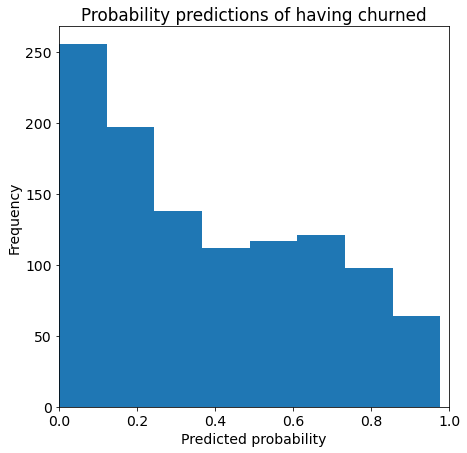

In [60]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list[:,1], bins=8)
plt.xlim(0, 1)
plt.title('Probability predictions of having churned')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show();

- About 25% of observations have probability <0.1
- Small number of observations with probability > 0.5
- This is below the threshold of 0.5
- Most would be predicted "no churn" in this case

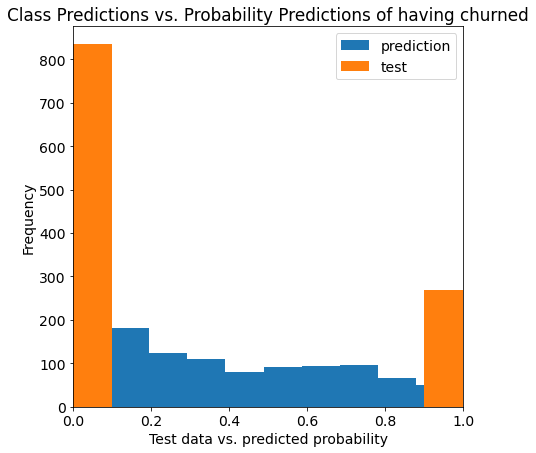

In [61]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list[:,1], label='prediction')
plt.hist(df_target_test, label='test')
plt.xlim(0, 1)
plt.title('Class Predictions vs. Probability Predictions of having churned')
plt.xlabel('Test data vs. predicted probability')
plt.ylabel('Frequency')
plt.legend()
plt.show();

- For this reason, the model will make more class predictions of not likely to churn (class no). 
- For this reason, we must **adjust the threshold for probability from 0.5 to 0.1** so that the classes the model predicts based on the probabilities, is similar to the class of the actual test data.

#### Adjusting classification threshold

In [62]:
prob_prediction_list_adj = binarize(prob_prediction_list, 0.1)

In [63]:
prob_prediction_list[0:10,1]
prob_prediction_list_adj[0:10,1]

array([0.66543843, 0.19458046, 0.10882373, 0.81316347, 0.15217456,
       0.00975209, 0.06662031, 0.48001859, 0.13618086, 0.18985547])

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [64]:
pd.crosstab(df_target_test, prob_prediction_list_adj[:,1], rownames=['Actually churned'], colnames=['Predicted to churn'], margins=True) #confusion matrix

Predicted to churn,0.0,1.0,All
Actually churned,,,
0,205,629,834
1,9,259,268
All,214,888,1102


In [65]:
print(classification_report(df_target_test, prob_prediction_list_adj[:,1]))

              precision    recall  f1-score   support

           0       0.96      0.25      0.39       834
           1       0.29      0.97      0.45       268

    accuracy                           0.42      1102
   macro avg       0.62      0.61      0.42      1102
weighted avg       0.80      0.42      0.41      1102



- Initially we were able to correctly classify 181 churn cases at a threshold of 0.5 with a recall score of 0.68. Now, when we lowered the threshold to 0.1, the model correctly classified more churn cases (259) with an increased recall score of 0.97

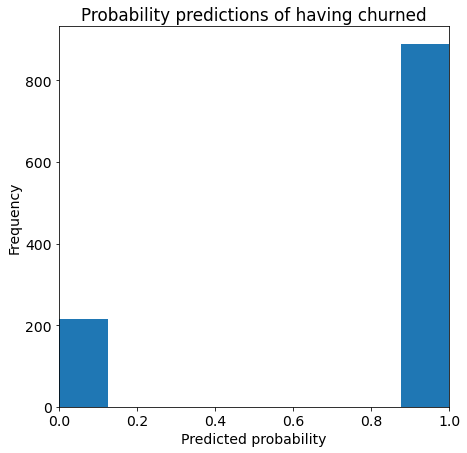

In [66]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list_adj[:,1], bins=8)
plt.xlim(0, 1)
plt.title('Probability predictions of having churned')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show();

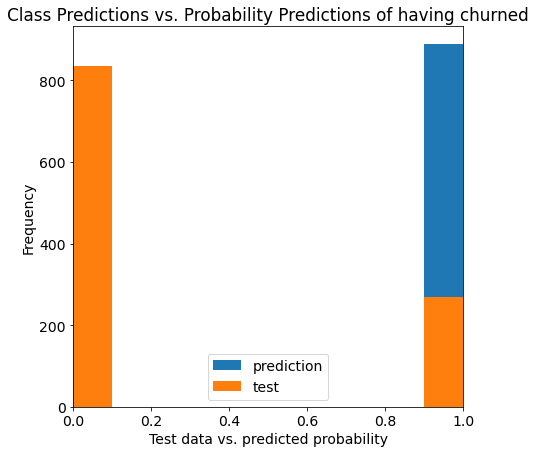

In [67]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list_adj[:,1], label='prediction')
plt.hist(df_target_test, label='test')
plt.xlim(0, 1)
plt.title('Class Predictions vs. Probability Predictions of having churned')
plt.xlabel('Test data vs. predicted probability')
plt.ylabel('Frequency')
plt.legend()
plt.show();

- It is possible to see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold. This is done by using AUROC

### 2. AUROC (Area Under the Receiver Operating Characteristic) Curve (Test accuracy)

In [68]:
fpr, tpr, thresholds = roc_curve(df_target_test, class_prediction_list) 
roc_auc = roc_auc_score(df_target_test, prob_prediction_list[:,1])
roc_auc

0.7799268048247967

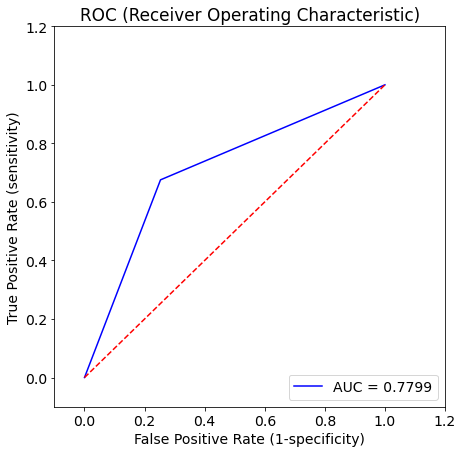

In [69]:
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlabel('False Positive Rate (1-specificity)')
plt.show();

In [70]:
# calculate cross-validated AUC
cross_val_score(logreg, df_features, df_target, cv=10, scoring='roc_auc').mean()

0.7808260773526465

## Final logistic regression model

### Extract Logistic Regression Model

- The logistic regression model is made up of the intercept and the coefficients.
- The coefficients we are predicting when using a logistic regression algorithm are called **log odds**
- Logistic regression algorithms are linear functions that predict log odds which are later transformed into 0 and 1s
- The coeffiecients right now in the summary table below are log odds

In [72]:
feature_names = df_unscaled_features.columns.values
feature_names

array(['number_of_unique_purchase_days', 'sum.Flagship store', 'sum.MBR',
       'sum.TeleShop', 'sum.e-Shop', 'sum.Bags', 'sum.Books',
       'sum.Clothing', 'sum.Electronics', 'sum.Footwear',
       'sum.Home and kitchen', 'sum.Academic', 'sum.Audio and video',
       'sum.Bath', 'sum.Cameras', 'sum.Children', 'sum.Comics',
       'sum.Computers', 'sum.DIY', 'sum.Fiction', 'sum.Furnishing',
       'sum.Kids', 'sum.Kitchen', 'sum.Mens', 'sum.Mobiles',
       'sum.Non-Fiction', 'sum.Personal Appliances', 'sum.Tools',
       'sum.Women', 'gender_M', 'biological_age.group_25_30',
       'biological_age.group_30_35', 'biological_age.group_35_40',
       'biological_age.group_40_45', 'account_age.years.group_02_03',
       'account_age.years.group_03_04', 'account_age.years.group__<01'],
      dtype=object)

In [73]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_names)
summary_table['Coefficient'] = np.transpose(logreg.coef_) # also known as weights
summary_table.head()

,Feature Name,Coefficient
0,number_of_unique_purchase_days,-1.28
1,sum.Flagship store,-0.11
2,sum.MBR,-0.17
3,sum.TeleShop,-0.10
4,sum.e-Shop,-0.07


In [74]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', logreg.intercept_[0]] # also known as bias
summary_table = summary_table.sort_index()
summary_table.head()

,Feature Name,Coefficient
0,intercept,-0.32
1,number_of_unique_purchase_days,-1.28
2,sum.Flagship store,-0.11
3,sum.MBR,-0.17
4,sum.TeleShop,-0.10


In [75]:
# coeff = list(logreg.coef_[0])
# labels = list(df_scaled_features_train.columns)
# intercept = list(logreg.intercept_)[0]
# list(zip(labels, coeff))

### Interpret model

- Intercept is also known as bias

- Coefficients are also known as weights

- The closer the weight is to 0, the smaller the weight. The further the weight from 0 (no matter positive or negative), the bigger the weight of the feature. This **ONLY HOLDS TRUE FOR MODELS WHERE ALL FEATURES ARE OF THE SAME SCALE** 4

- When the coefficients are standardized it means their variance is of the same scale ie 1 so we can determine the more important features by how big the weight or coefficient is. For the ease of interpretation and other reasons, you would want the standardize the features when doing machine learning.

- The logistic regression coefficients are log odds.

- However, taking the exponential of the log odds results in odds ratios (which enable us interpret the coefficients)

In [76]:
summary_table['Odds_ratio'] = np.exp(summary_table['Coefficient'])

In [78]:
summary_table.head()

,Feature Name,Coefficient,Odds_ratio
0,intercept,-0.32,0.72
1,number_of_unique_purchase_days,-1.28,0.28
2,sum.Flagship store,-0.11,0.90
3,sum.MBR,-0.17,0.84
4,sum.TeleShop,-0.10,0.90


In [79]:
summary_table = summary_table.sort_values(['Odds_ratio'], ascending=False)
summary_table

,Feature Name,Coefficient,Odds_ratio
36,account_age.years.group_03_04,1.56,4.75
35,account_age.years.group_02_03,0.29,1.34
27,sum.Personal Appliances,0.02,1.02
25,sum.Mobiles,0.01,1.01
20,sum.Fiction,-0.00,1.00
16,sum.Children,-0.01,0.99
17,sum.Comics,-0.01,0.99
10,sum.Footwear,-0.01,0.99
21,sum.Furnishing,-0.02,0.98
14,sum.Bath,-0.03,0.97


- A feature is not particularly important if it's:

    -- **coefficient/ weight/ log odds is around 0** (log odds of 0 means no matter the feature value we will multiply it by the weight/ coefficient/ log odds of 0 which will result in 0 in the model)
    
    -- **odds ratio is around 0**

- **Interpretation:**
    
    For a 1 unit **change* in the **standardized feature**, the **odds increase by a multiple equals to the odds ratio**
    
    **This means that if the odds ratio is 1 the odds do not change at all**
    
    odds x odds ratio = new odds (a unit change)
        eg if odds is 5:1 and odds ratio is 2, then new odds is 10:1
        eg if odds is 5:1 and odds ratio is 0.2, then new odds is 1:1
        eg if odds is 5:1 and odds ratio is 1, then new odds is 5:1

- For particular use case, if coefficients of any of the features is around 0 (meaning the odds ratio is around 1), then in interpreting it, I will say that given all features, those features are the ones that seem not to make a difference in predicting if a customer will churn

In [81]:
df_churn_raw['account_age.years.group'].value_counts(dropna=False)

03_04    3626
02_03    1444
01_02     391
NaN       141
_<01       45
Name: account_age.years.group, dtype: int64

In [83]:
df_churn_raw['biological_age.group'].value_counts(dropna=False)

25_30    1220
30_35    1218
35_40    1197
40_45    1022
22_25     849
NaN       141
Name: biological_age.group, dtype: int64

### Feature importance

In [ ]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Further Analysis

- Whale curve, retention curve, power user - SFL
- Preprocessing data - PCA https://www.researchgate.net/post/Can-we-do-PCA-before-logistic-regression
https://wiki.pathmind.com/eigenvector, farmerline tutorial
- Applying NearMiss Algorithm https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
- Cross-validation (model selection and feature selection)
- Algorithm - Survival analysis https://square.github.io/pysurvival/tutorials/churn.html
- Algorithm - Quantile Regression
- Algorithm - Transition Matrix
- Feature selection - Lasso and Ridge Regularization, farmerline tutorial
https://chrisalbon.com/machine_learning/logistic_regression/logistic_regression_with_l1_regularization/
- Feature selection - RFE https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- Coefficient interpretation https://rpubs.com/OmaymaS/182726
- Null accuracy vs Accuracy Paradox
- Hyperparameter tuning 
- Cost-benefit analysis / Business impact - https://www.dataoptimal.com/churn-prediction-with-r/
- Save model and deploy 
- Story telling, metrics, business headlines - https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b

### Useful Resources

- Dummy variables https://www.quora.com/How-and-why-having-the-same-number-of-dummy-variables-as-categories-is-problematic-in-linear-regression-Dummy-variable-trap-Im-looking-for-a-purely-mathematical-not-intuitive-explanation-Also-please-avoid-using-the/answer/Iliya-Valchanov?share=9494e990&srid=uX7Kg
- Implication of error in prediction https://www.sciencedirect.com/science/article/pii/S0020025519312022
- Model Evaluation - https://www.ritchieng.com/machine-learning-evaluate-classification-model/
- Redefining churn tag - https://www.diva-portal.org/smash/get/diva2:1439342/FULLTEXT01.pdf
https://github.com/jsaikmr/Telecom-Churn-Prediction
https://core.ac.uk/download/pdf/83461632.pdf (churn event shift pg 68)